In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

import os
import glob

from nfl import Team, Game, Play, Player

In [2]:
games = pd.read_csv('data/games.csv')

In [3]:
players = pd.read_csv('data/players.csv').set_index('nflId')

In [4]:
plays = pd.read_csv('data/plays.csv')

In [5]:
weeks = {}
for i in range(1):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join('data',name+'.csv'))

In [6]:
team_names = games['homeTeamAbbr'].unique()

In [7]:
teams = {}
for name in team_names:
    teams[name] = Team(abbr=name)

In [8]:
for i in range(games.shape[0]):
    _game_info = games.loc[i]
    gameId = _game_info['gameId']
    homeTeamAbbr = _game_info['homeTeamAbbr']
    visitorTeamAbbr = _game_info['visitorTeamAbbr']
    week = _game_info['week']
    
    game_plays = plays[plays['gameId'] == gameId]
    home_game_plays = game_plays[game_plays['possessionTeam']==homeTeamAbbr].sort_values(by=['playId']).reset_index(drop=True)
    away_game_plays = game_plays[game_plays['possessionTeam']==visitorTeamAbbr].sort_values(by=['playId']).reset_index(drop=True)
    
    teams[homeTeamAbbr].games[f'week{week}'] = Game(gameId,opponent=visitorTeamAbbr,game_info=_game_info,
                                                    play_data=away_game_plays,location='home')
    teams[visitorTeamAbbr].games[f'week{week}'] = Game(gameId,opponent=homeTeamAbbr,game_info=_game_info,
                                                    play_data=home_game_plays,location='away')

In [9]:
team = teams['IND']

In [10]:
for key in ('week1',):
    game = team.games[key]
    
    week_data = weeks[key]
    
    for i in game.play_data.index:
        play = game.play_data.loc[i]
        tracking_data = week_data[(week_data['gameId']==play['gameId'])&(week_data['playId']==play['playId'])]
        player_tracking = tracking_data[tracking_data['nflId'].notna()]
        fb_tracking = tracking_data[tracking_data['displayName']=='Football'].sort_values(by='frameId').reset_index(drop=True)
        
        game.plays.append(Play(play['playId'],play_data=play,player_tracking=player_tracking,
                               fb_tracking=fb_tracking,defensive_team=game.location))

In [11]:
game = team.games['week1']

In [12]:
game.opponent

'CIN'

In [13]:
game.location

'home'

In [14]:
play = game.plays[20]

In [15]:
print(play)

(6:31) A.Dalton pass incomplete short right to J.Mixon.


In [16]:
play.play_data

gameId                                                           2018090902
playId                                                                 2739
playDescription           (6:31) A.Dalton pass incomplete short right to...
quarter                                                                   3
down                                                                      2
yardsToGo                                                                 6
possessionTeam                                                          CIN
playType                                                     play_type_pass
yardlineSide                                                            CIN
yardlineNumber                                                           40
offenseFormation                                                 SINGLEBACK
personnelO                                                 1 RB, 1 TE, 3 WR
defendersInTheBox                                                         6
numberOfPass

In [17]:
play.player_tracking

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
378971,2018-09-09T19:03:50.599Z,48.49,29.53,0.00,0.00,0.00,139.70,137.75,None,2495143.0,Andy Dalton,14.0,QB,1,away,2018090902,2739,right,NaN
378973,2018-09-09T19:03:50.599Z,48.91,39.32,0.01,0.01,0.01,91.56,161.20,None,2495450.0,A.J. Green,18.0,WR,1,away,2018090902,2739,right,CROSS
378978,2018-09-09T19:03:50.599Z,62.33,19.00,0.27,0.08,0.08,253.58,245.33,None,2552386.0,Clayton Geathers,26.0,FS,1,home,2018090902,2739,right,NaN
378980,2018-09-09T19:03:50.599Z,47.83,25.17,0.00,0.00,0.00,54.37,325.68,None,2552559.0,C.J. Uzomah,87.0,TE,1,away,2018090902,2739,right,NaN
378983,2018-09-09T19:03:50.599Z,47.04,19.74,0.07,2.23,0.04,89.11,11.49,None,2555466.0,Tyler Boyd,83.0,WR,1,away,2018090902,2739,right,CROSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380760,2018-09-09T19:03:56.500Z,73.41,11.85,7.69,3.44,0.78,229.38,211.69,None,2558060.0,Malik Hooker,29.0,FS,60,home,2018090902,2739,right,NaN
380762,2018-09-09T19:03:56.500Z,82.99,15.77,5.74,2.82,0.59,4.32,51.97,None,2558108.0,Nate Hairston,27.0,CB,60,home,2018090902,2739,right,NaN
380763,2018-09-09T19:03:56.500Z,49.06,13.51,7.59,1.33,0.76,216.38,209.32,None,2558851.0,Anthony Walker,50.0,ILB,60,home,2018090902,2739,right,NaN
380764,2018-09-09T19:03:56.500Z,34.81,16.44,3.91,2.07,0.40,275.62,273.97,None,2558976.0,Kenny Moore,23.0,CB,60,home,2018090902,2739,right,NaN


In [18]:
play.defensive_team

'home'

In [19]:
defensive_player_tracking = play.player_tracking[play.player_tracking['team'] == play.defensive_team]
offensive_player_tracking = play.player_tracking[play.player_tracking['team'] != play.defensive_team]

In [20]:
offensive_player_tracking

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
378971,2018-09-09T19:03:50.599Z,48.49,29.53,0.00,0.00,0.00,139.70,137.75,None,2495143.0,Andy Dalton,14.0,QB,1,away,2018090902,2739,right,NaN
378973,2018-09-09T19:03:50.599Z,48.91,39.32,0.01,0.01,0.01,91.56,161.20,None,2495450.0,A.J. Green,18.0,WR,1,away,2018090902,2739,right,CROSS
378980,2018-09-09T19:03:50.599Z,47.83,25.17,0.00,0.00,0.00,54.37,325.68,None,2552559.0,C.J. Uzomah,87.0,TE,1,away,2018090902,2739,right,NaN
378983,2018-09-09T19:03:50.599Z,47.04,19.74,0.07,2.23,0.04,89.11,11.49,None,2555466.0,Tyler Boyd,83.0,WR,1,away,2018090902,2739,right,CROSS
378987,2018-09-09T19:03:50.599Z,42.31,29.57,0.00,0.01,0.01,187.77,87.92,None,2557976.0,Joe Mixon,28.0,HB,1,away,2018090902,2739,right,FLAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380743,2018-09-09T19:03:56.500Z,63.91,11.58,7.44,3.10,0.76,190.44,190.38,None,2495450.0,A.J. Green,18.0,WR,60,away,2018090902,2739,right,CROSS
380750,2018-09-09T19:03:56.500Z,38.80,22.08,5.57,2.73,0.56,187.77,175.61,None,2552559.0,C.J. Uzomah,87.0,TE,60,away,2018090902,2739,right,NaN
380753,2018-09-09T19:03:56.500Z,50.85,47.42,0.42,1.20,0.04,197.62,208.98,None,2555466.0,Tyler Boyd,83.0,WR,60,away,2018090902,2739,right,CROSS
380757,2018-09-09T19:03:56.500Z,41.29,8.96,2.77,5.71,0.32,56.11,151.40,None,2557976.0,Joe Mixon,28.0,HB,60,away,2018090902,2739,right,FLAT


In [21]:
offensive_players = {}
defensive_players = {}

In [22]:
players.head()

,height,weight,birthDate,collegeName,position,displayName
nflId,,,,,,
2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [23]:
for nflId in offensive_player_tracking['nflId'].unique():
    nflId = int(nflId)
    _player_data = players.loc[nflId]
    _player_tracking = offensive_player_tracking[offensive_player_tracking['nflId']==nflId]
    _player_tracking = _player_tracking.sort_values(by='frameId').reset_index(drop=True)
    offensive_players[nflId] = Player(nflId, player_data=_player_data, tracking_data=_player_tracking)

In [24]:
for nflId in defensive_player_tracking['nflId'].unique():
    nflId = int(nflId)
    _player_data = players.loc[nflId]
    _player_tracking = defensive_player_tracking[defensive_player_tracking['nflId']==nflId]
    _player_tracking = _player_tracking.sort_values(by='frameId').reset_index(drop=True)
    defensive_players[nflId] = Player(nflId, player_data=_player_data, tracking_data=_player_tracking)

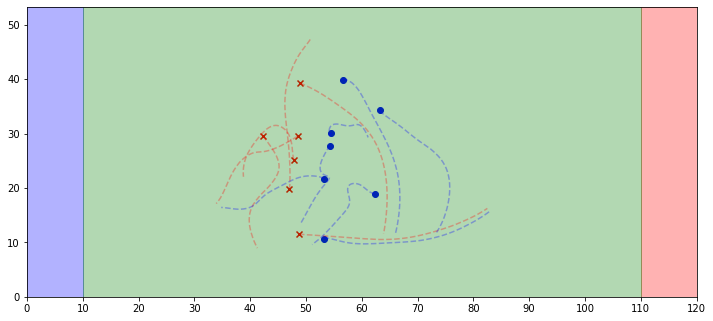

In [25]:
fig,ax = plt.subplots(figsize=(12,5.33))

ax.axvspan(0,10,color='b',alpha=.3)
ax.axvspan(110,120,color='r',alpha=.3)
ax.axvspan(10,110,color='g',alpha=.3)

for player in offensive_players.values():
    init_pos = player.tracking_data.loc[0]
    ax.scatter(init_pos['x'],init_pos['y'],color='r',marker='x')
    
    x = player.tracking_data['x'].values
    y = player.tracking_data['y'].values
    ax.plot(x,y,color='r',alpha=.3,linestyle='--')
    
for player in defensive_players.values():
    init_pos = player.tracking_data.loc[0]
    ax.scatter(init_pos['x'],init_pos['y'],color='b',marker='o')
    
    x = player.tracking_data['x'].values
    y = player.tracking_data['y'].values
    ax.plot(x,y,color='b',alpha=.3,linestyle='--')

ax.set_xlim(0,120)
ax.set_ylim(0,53.3)

ax.set_xticks(np.arange(0,121,10))

plt.show()

In [26]:
play.fb_tracking

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-09T19:03:50.599Z,50.08,29.71,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018090902,2739,right,NaN
1,2018-09-09T19:03:50.700Z,50.09,29.71,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,2,football,2018090902,2739,right,NaN
2,2018-09-09T19:03:50.799Z,50.09,29.70,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,3,football,2018090902,2739,right,NaN
3,2018-09-09T19:03:50.900Z,50.09,29.70,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,4,football,2018090902,2739,right,NaN
4,2018-09-09T19:03:51.000Z,50.09,29.70,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,5,football,2018090902,2739,right,NaN
5,2018-09-09T19:03:51.099Z,50.09,29.70,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,6,football,2018090902,2739,right,NaN
6,2018-09-09T19:03:51.200Z,50.09,29.70,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,7,football,2018090902,2739,right,NaN
7,2018-09-09T19:03:51.299Z,50.09,29.70,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,8,football,2018090902,2739,right,NaN
8,2018-09-09T19:03:51.400Z,50.09,29.70,0.00,0.00,0.00,NaN,NaN,man_in_motion,NaN,Football,NaN,NaN,9,football,2018090902,2739,right,NaN
9,2018-09-09T19:03:51.500Z,50.09,29.70,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,10,football,2018090902,2739,right,NaN


In [40]:
play_events = play.fb_tracking['event'].values

In [41]:
play_events

array(['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'man_in_motion', 'None', 'ball_snap', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'play_action', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'pass_forward',
       'None', 'None', 'None', 'None', 'None', 'pass_arrived', 'None',
       'pass_outcome_incomplete', 'None'], dtype=object)

In [48]:
events = {}
for k, event in enumerate(play_events):
    if event != 'None':
        events[event] = k + 1

In [49]:
events

{'man_in_motion': 9,
 'ball_snap': 11,
 'play_action': 22,
 'pass_forward': 51,
 'pass_arrived': 57,
 'pass_outcome_incomplete': 59}